In [1]:
!gdown https://drive.google.com/uc?id=1-MgHBM01grW2O8N-aVO5p5en16Ko-aH5
!unzip /content/PlantVillage.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/fee1de1c-c369-4535-baec-d6104df9a05d___Com.G_SpM_FL 9396.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff0f33d2-9e9f-4b74-861d-a7e0fdf8d248___Com.G_SpM_FL 8511.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff146f2c-dbb7-4da0-aa98-a36351435489___Com.G_SpM_FL 9654.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff20d775-59a6-437c-9039-f72d07aa4484___Com.G_SpM_FL 8524.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff6346ca-227b-4cb4-a350-0941048744fa___Com.G_SpM_FL 9338.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ff9a52b5-b200-4f23-9e0d-629b1a0e89db___Com.G_SpM_FL 8634.JPG  
  inflating: PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/ffb00771-1462-4c9d-962b-7aaa7e8d5a51___Com.G_SpM_FL 1411.JPG  
  inflating: PlantVillage/Tomato_

# CNN 다중 분류 (컬러이미지)
- 식물 잎사귀 병 분류


In [2]:
!pip install --q ipython-autotime
%load_ext autotime

time: 384 µs (started: 2024-09-12 08:28:23 +00:00)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 12.1 s (started: 2024-09-12 08:28:23 +00:00)


## 1.데이터 준비

In [4]:
data_root = '/content/PlantVillage'

time: 863 µs (started: 2024-09-12 08:28:35 +00:00)


### 데이터 로딩

In [5]:
class_name = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

time: 463 µs (started: 2024-09-12 08:28:35 +00:00)


In [6]:
import os

train_early_fnames = os.listdir(data_root + '/Potato___Early_blight')
train_late_fnames = os.listdir(data_root + '/Potato___Late_blight')
train_healthy_fnames = os.listdir(data_root + '/Potato___healthy')
print(train_early_fnames[:5])
print(train_late_fnames[:5])
print(train_healthy_fnames[:5])

['43ddad18-d70a-49d3-97d6-9a5f82ddeecd___RS_Early.B 9069.JPG', '20421747-c083-48a1-aed5-b1097ae50491___RS_Early.B 8203.JPG', 'f8b57e69-5902-4253-8404-11811ecf13e8___RS_Early.B 6995.JPG', '5bdc7f1d-26cc-45b2-b77f-e98084418fd9___RS_Early.B 7486.JPG', 'e4b0f6ac-2b1e-4e10-8733-de421a01c390___RS_Early.B 8254.JPG']
['df5eb1ff-9261-45ab-ae3f-bf942cdf1a72___RS_LB 2947.JPG', '4ac84ca7-f60a-406e-938d-40f4ba5b75ce___RS_LB 2731.JPG', 'd43fa915-e947-4316-b0f5-0f925c5d9625___RS_LB 3969.JPG', '05a51957-779c-4a2f-bf2a-d1fb03947793___RS_LB 4772.JPG', '9631fd8f-244c-4047-98e4-aecc907624c1___RS_LB 4573.JPG']
['b28c43f9-5844-4e9b-86bf-36bc114cae07___RS_HL 1736.JPG', 'f0fdde26-78b4-46f0-9eb8-7c2a743d34aa___RS_HL 4165.JPG', '849aa978-c7b9-4344-9ca8-129219a65f8e___RS_HL 1874.JPG', '2ccb9ee9-faac-4d32-9af5-29497fa2e028___RS_HL 1837.JPG', 'aa04db6d-645f-4e8a-88dc-c9f9396f0800___RS_HL 1975.JPG']
time: 10 ms (started: 2024-09-12 08:28:35 +00:00)


In [7]:
import PIL

X_train = []
y_train = []

for fname in train_early_fnames:
    image = PIL.Image.open(data_root + '/Potato___Early_blight/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

for fname in train_late_fnames:
    image = PIL.Image.open(data_root + '/Potato___Late_blight/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

for fname in train_healthy_fnames:
    image = PIL.Image.open(data_root + '/Potato___healthy/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(2)

len(X_train), len(y_train)

(2152, 2152)

time: 11.6 s (started: 2024-09-12 08:28:35 +00:00)


In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2152, 224, 224, 3) (2152,)
time: 132 ms (started: 2024-09-12 08:28:46 +00:00)


## 2.학습, 검증 데이터 분리

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,
                                                  shuffle=True,
                                                  random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,
                                                  shuffle=True,
                                                  random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1290, 224, 224, 3) (431, 224, 224, 3) (431, 224, 224, 3)
(1290,) (431,) (431,)
time: 802 ms (started: 2024-09-12 08:28:47 +00:00)


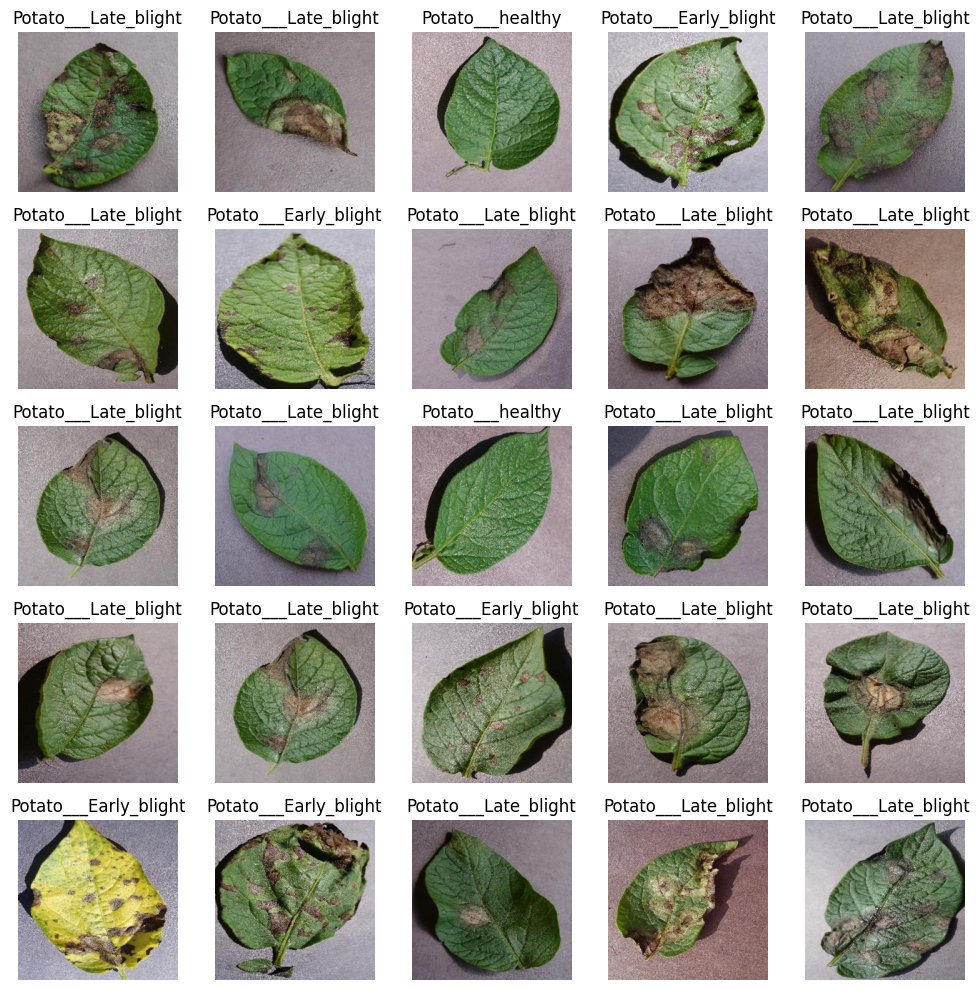

In [10]:
# np.random.seed(42)
sample = np.random.randint(1290, size=25)

fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
fig.tight_layout()
plt.show()

## 3.전처리

In [11]:
X_train_s = X_train.astype('float')/255.
X_val_s = X_val.astype('float')/255.

time: 6.14 s (started: 2024-09-12 08:28:47 +00:00)
time: 1.69 s (started: 2024-09-12 08:28:54 +00:00)


## 4.모델
- Conv layer

In [12]:
X_train_s.shape, X_val_s.shape

((1290, 224, 224, 3), (431, 224, 224, 3))

time: 8.04 ms (started: 2024-09-12 08:28:55 +00:00)


In [13]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, activation='relu',
                  input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


time: 1.04 s (started: 2024-09-12 08:28:55 +00:00)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,949,539 (45.58 MB)

 Trainable params: 11,949,539 (45.58 MB)

 Non-trainable params: 0 (0.00 B)

time: 35.7 ms (started: 2024-09-12 08:28:56 +00:00)


In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

time: 45.2 ms (started: 2024-09-12 08:28:56 +00:00)


In [18]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor="val_loss",patience=5)

time: 666 µs (started: 2024-09-12 08:28:56 +00:00)


In [19]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

y_val

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

time: 8.52 ms (started: 2024-09-12 08:28:56 +00:00)


In [20]:
EPOCHS = 20
BATCH_SIZE = 32

print(X_train_s.shape, y_train.shape)
print(X_val_s.shape, y_val.shape)

history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[es],
                    validation_data=(X_val_s, y_val))

(1290, 224, 224, 3) (1290, 3)
(431, 224, 224, 3) (431, 3)
Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.5065 - loss: 4.5403 - val_accuracy: 0.7749 - val_loss: 0.8354
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.7957 - loss: 0.5925 - val_accuracy: 0.8724 - val_loss: 0.5590
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8750 - loss: 0.3505 - val_accuracy: 0.8817 - val_loss: 0.3897
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9309 - loss: 0.1916 - val_accuracy: 0.9258 - val_loss: 0.2955
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9521 - loss: 0.1296 - val_accuracy: 0.9188 - val_loss: 0.2124
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9704 - loss: 0.0819 - val_accuracy: 0.9234 - val_loss: 0.2210
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9608 - loss: 0.0943 - val_accuracy: 0.9420 - val_loss: 0.1621
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step 

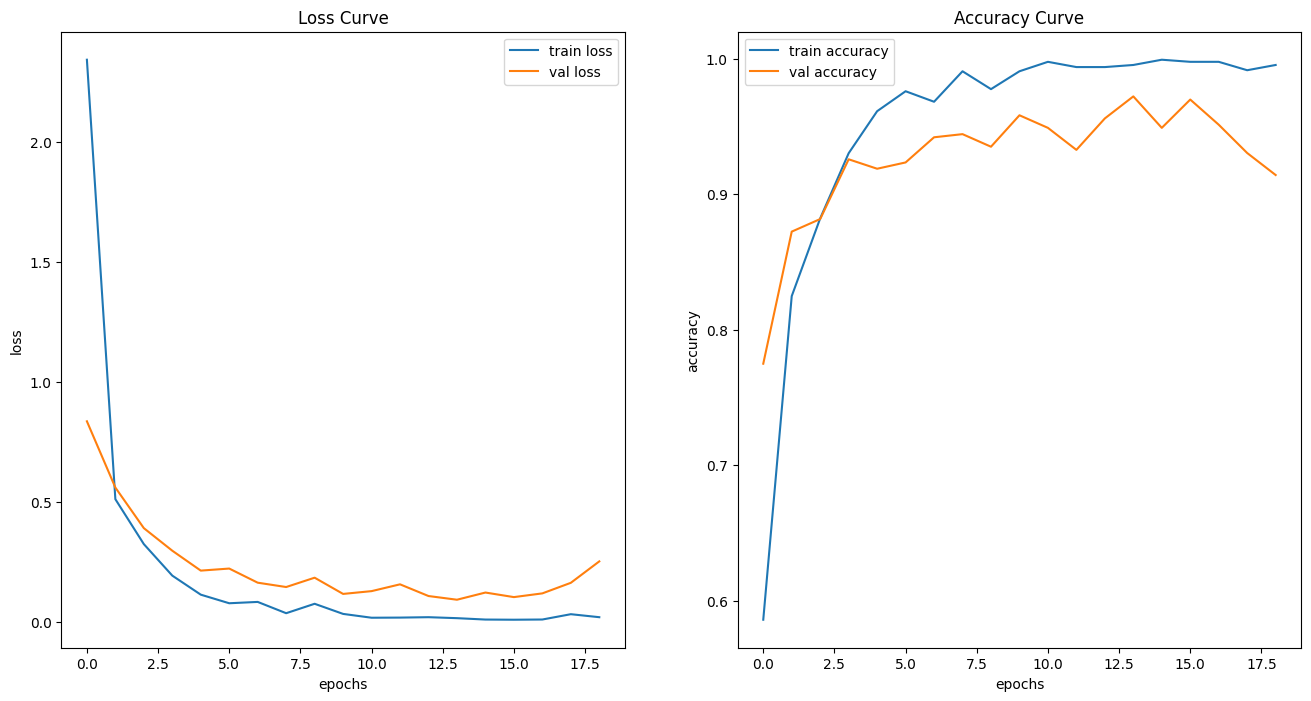

time: 626 ms (started: 2024-09-12 08:29:56 +00:00)


In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

## 5.검증

In [24]:
# 테스트데이터 전처리
# 평가(메트릭스)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test = to_categorical(y_test)
y_test_classes = np.argmax(y_test, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
time: 382 ms (started: 2024-09-12 08:41:08 +00:00)


In [27]:
print(y_pred_classes)
print(y_test_classes)

[2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 2 0 0 2 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 0 0
 0 0 2 2 0 0 0 2 0 0 2 2 0 0 2 0 1 2 0 0 0 2 0 1 0 0 2 2 0 0 0 2 2 2 2 2 2
 0 0 2 2 0 0 0 0 2 0 2 2 0 2 0 2 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 2 0 0 2 0 2 2 0 0 0 2 0 2 0 2 0 2 0 2 2 2 2 0 2 2 0 0 2 2 0 0 0 0 0 0 0
 2 0 0 0 0 0 2 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0
 0 2 0 0 0 2 2 0 2 0 0 2 2 0 2 0 0 2 2 0 0 0 2 2 2 0 0 2 0 2 0 0 2 0 2 0 0
 0 0 2 0 2 2 0 2 0 2 2 0 2 0 0 2 2 0 2 0 0 0 0 2 0 2 2 0 0 2 0 0 0 0 1 0 0
 0 2 0 0 0 2 2 2 2 0 2 2 0 2 0 0 0 2 0 0 2 2 2 0 0 0 0 0 2 2 2 2 2 2 0 0 0
 0 2 2 2 0 0 2 0 0 2 0 2 0 2 2 0 2 0 0 2 2 0 0 2 0 2 0 0 0 2 2 0 2 2 0 2 0
 2 2 0 2 2 0 0 2 2 2 0 0 2 0 2 0 0 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 0 0 0
 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0]
[1 1 0 0 1 0 1 1 1 0 0 0 0 2 0 1 1 0 2 0 1 1 0 1 0 2 2 1 1 0 1 0 2 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 0 0 2 1 0 1 0 0 1 1 0 1 1 1

(431, 3) (431, 3)
(431,) (431,)
accuracy: 0.5336426914153132
recall: 0.6615130900845186
precision: 0.6518912933002632
f1 : 0.4081573580560434


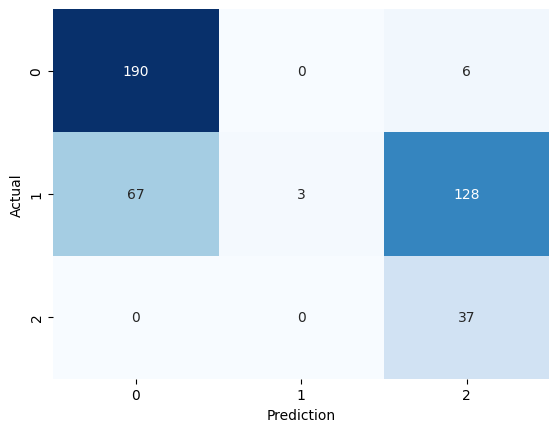

time: 241 ms (started: 2024-09-12 08:44:41 +00:00)


In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

print(y_test.shape, y_pred.shape)
print(y_test_classes.shape, y_pred_classes.shape)

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test_classes, y_pred_classes, aver='macro')

## 5. 모델
- vgg16

In [30]:
from keras.applications import vgg16

base_model = vgg16.VGG16(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3))

base_model.trainable = False # 기존에 있는 그대로  사용하겠다는 소리; 추가로 학습하지 않음
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

time: 713 ms (started: 2024-09-12 08:45:09 +00:00)


In [32]:
from keras import layers

model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())


model.add(layers.Dense(1024, activation= 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation= 'softmax'))

# model.summary()

time: 21.7 ms (started: 2024-09-12 08:45:18 +00:00)


In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

time: 7.33 ms (started: 2024-09-12 08:45:20 +00:00)


In [34]:
epochs = 20
batch_size = 32

history = model.fit(
    X_train_s, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_s, y_val)
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 676ms/step - accuracy: 0.4659 - loss: 3.1616 - val_accuracy: 0.8561 - val_loss: 0.3543
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 196ms/step - accuracy: 0.8244 - loss: 0.5225 - val_accuracy: 0.9281 - val_loss: 0.1947
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.8964 - loss: 0.2737 - val_accuracy: 0.9374 - val_loss: 0.1666
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.9394 - loss: 0.1687 - val_accuracy: 0.9374 - val_loss: 0.1601
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.9491 - loss: 0.1227 - val_accuracy: 0.9188 - val_loss: 0.1843
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.9349 - loss: 0.1600 - val_accuracy: 0.9118 - val_loss: 0.1772
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9621 - loss: 0.0900 - val_accuracy: 0.9443 - val_loss: 0.1453
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.9819 - loss: 0.0564 - val_accura

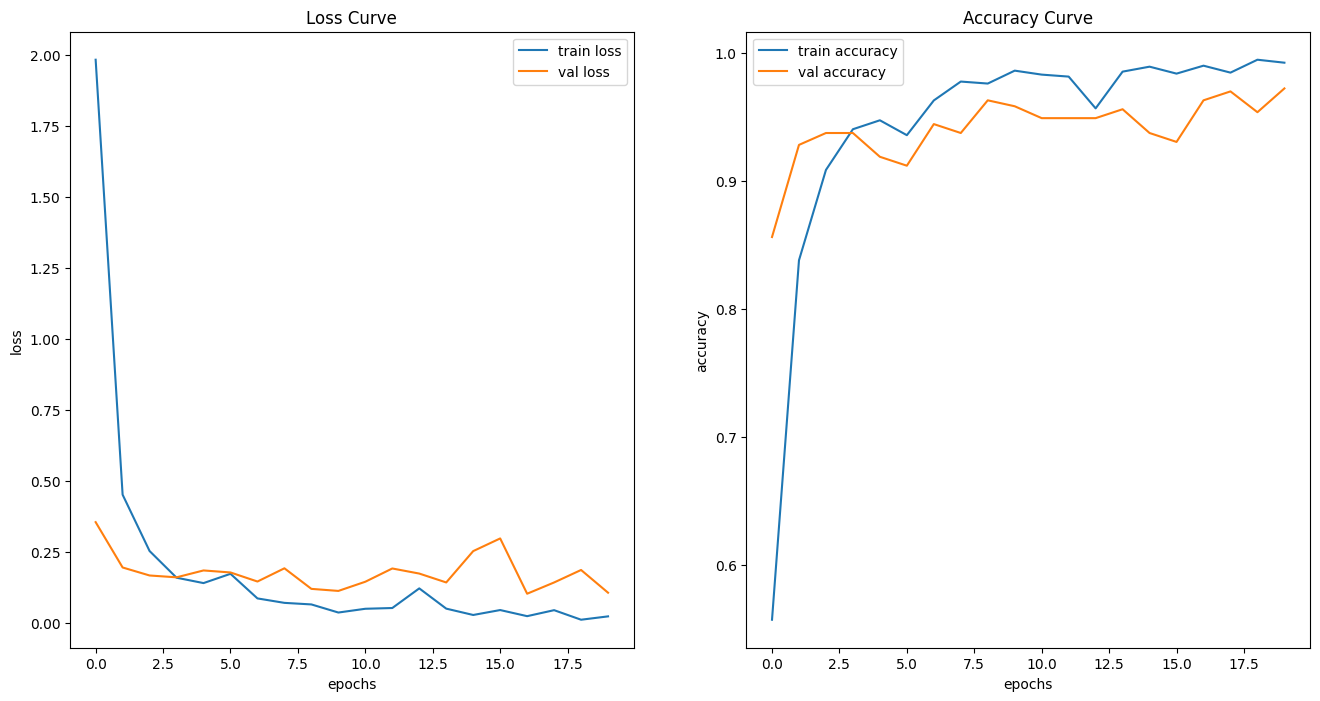

time: 443 ms (started: 2024-09-12 08:49:57 +00:00)


In [35]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
accuracy: 0.4779582366589327
recall: 0.4160979160979161
precision: 0.7888888888888889
f1 : 0.34313087034139106


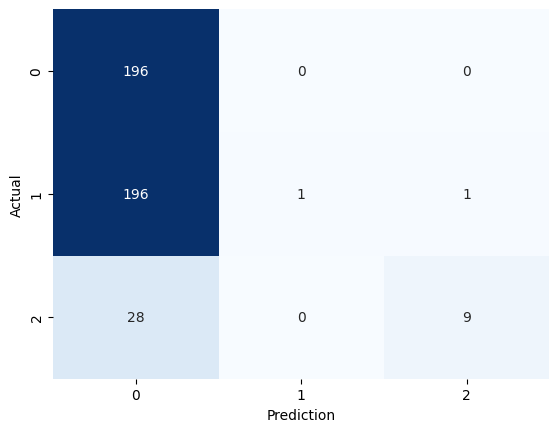

time: 2.87 s (started: 2024-09-12 08:49:57 +00:00)


In [36]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred, aver='macro'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred, average=aver))
    print('precision:', precision_score(y_true, y_pred, average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test_classes, y_pred_classes)
